### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
## Investigate dataframe for missing values
missing_values = data.isnull()

## Investigate datafram for missing values per column
missing_count = data.isnull().sum()

## Identify columns with missing values in descending order so problemtic data (if any) can be identified
missing_columns = missing_count.sort_values(ascending=False)

## Identify missing data percentage per column to decide whether to drop, replce, or any other acation 
missing_percentage = (missing_count/len(data)) * 100

print(missing_values)
print(missing_count)
print(missing_columns)
print(missing_percentage)

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
## Dropping [car] column as it has more than 99% missing data
data_temp = data.drop(columns='car')

## Dropping rows from columns [CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar ] that have missing data
data_new = data_temp.dropna(subset=['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar'])

## Reviewing new dataframe
data_new.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [6]:
## Identify number of rows and % of rows dropped after cleaning data
dropped_rows_count = len(data) - len(data_new)
dropped_rows_percentage = (dropped_rows_count/len(data)) * 100

print(dropped_rows_count)
print(dropped_rows_percentage)

605
4.769788710186061


4. What proportion of the total observations chose to accept the coupon?



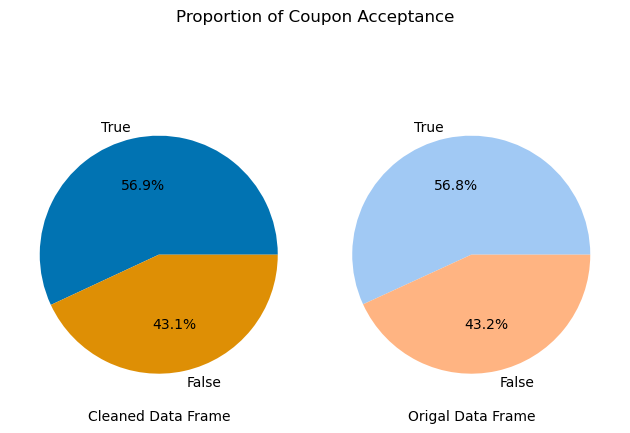

In [76]:
## Find proportion of the total observations that chose to accept the coupon in origiral [data] dataframe and cleaned [data_new] dataframe
## If there is huge shift in proportion of acceptance betweem dataframes then there is need to reivew data cleaning steps 
accpeted_coupon = (data['Y'] == 1).value_counts(normalize=True) * 100
accpeted_coupon_new = (data_new['Y'] == 1).value_counts(normalize=True) * 100

## Printing graphs for both cases in one plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle('Proportion of Coupon Acceptance')

# Plot the first chart
ax1.pie(accpeted_coupon_new, labels=accpeted_coupon_new.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax1.set_xlabel('Cleaned Data Frame')

# Plot the second chart
ax2.pie(accpeted_coupon, labels=accpeted_coupon.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax2.set_xlabel('Origal Data Frame')

plt.tight_layout()
plt.savefig('images/pie1.png')


5. Use a bar plot to visualize the `coupon` column.

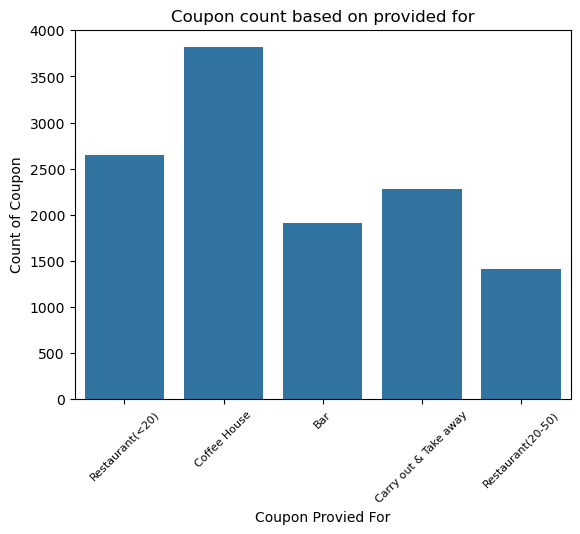

In [167]:
## Crating bar plot to visualize the coupon column only

sns.countplot(data_new, x='coupon' )
plt.title('Coupon count based on provided for')
plt.xlabel('Coupon Provied For')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Count of Coupon')
plt.savefig('images/coupon.png')


6. Use a histogram to visualize the temperature column.

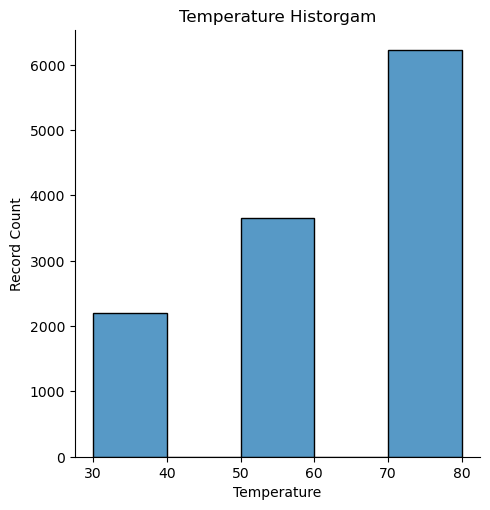

In [214]:
## Creating a histgoram to visualize temperature, adding Kernel Desnity Estimate (KDE) and rug 
sns.displot(data_new, x='temperature', bins=5)
plt.title('Temperature Historgam')
plt.xlabel('Temperature')
plt.ylabel('Record Count')
plt.savefig('images/temp_hist.png')




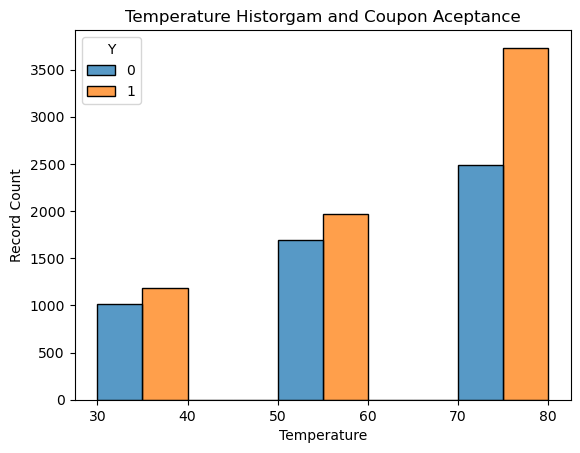

In [215]:
## Creating a histgoram to visualize temperature and its impact of coupon acceptance 

sns.histplot(data_new, x='temperature',bins=5, hue='Y',multiple='dodge')
plt.title('Temperature Historgam and Coupon Aceptance')
plt.xlabel('Temperature')
plt.ylabel('Record Count')
plt.savefig('images/hist_temp_Y.png')

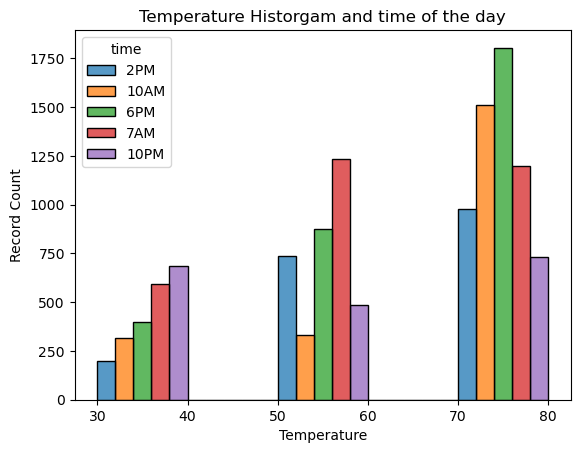

In [216]:
## Creating temperature histogram against time of the day
sns.histplot(data_new, x='temperature',bins=5, hue='time', multiple='dodge')
plt.title('Temperature Historgam and time of the day')
plt.xlabel('Temperature')
plt.ylabel('Record Count')
plt.savefig('images/hist_temp_time.png')

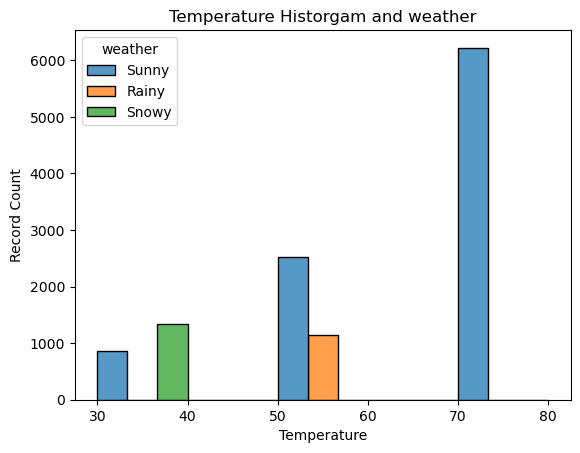

In [217]:
## Creating temperature histogram with weather 

sns.histplot(data_new, x='temperature', hue='weather', bins=5, multiple='dodge')
plt.title('Temperature Historgam and weather')
plt.xlabel('Temperature')
plt.ylabel('Record Count')
plt.savefig('images/hist_temp_weather.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
## Creting a new dataframe by seleting records where coupon column has value Bar

data_bar = data_new[data_new['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


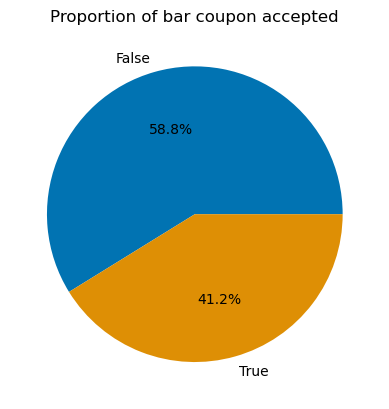

In [218]:
## Identifying proportion of bar coupons that were accepted and creating visualization

bar_coup_accepted = (data_bar['Y'] == 1).value_counts(normalize=True)
plt.pie(bar_coup_accepted, labels=bar_coup_accepted.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
plt.title('Proportion of bar coupon accepted')
plt.savefig('images/coup_bar.png')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


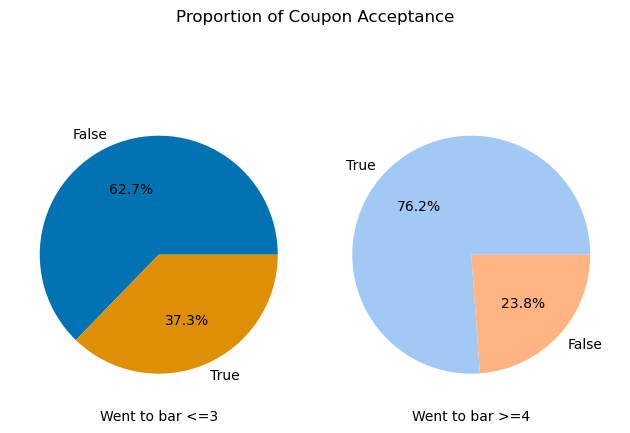

In [219]:
## Calculating proportion of coupon accpetance for individuals that went to bar 3 or fewer times 
three_or_few = (data_bar.query('Bar == "never" or Bar == "1~3" or Bar == "less1"')['Y'] == 1).value_counts(normalize=True)

## Calculating proportion of coupon accpetance for individuals that went to bar 4 or more times
four_or_more = (data_bar.query('Bar == "gt8" or Bar == "4~8"')['Y'] == 1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle('Proportion of Coupon Acceptance')

# Plot the first chart
ax1.pie(three_or_few, labels=three_or_few.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax1.set_xlabel('Went to bar <=3')

# Plot the second chart
ax2.pie(four_or_more, labels=four_or_more.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax2.set_xlabel('Went to bar >=4')

plt.tight_layout()
plt.savefig('images/coup_bar_prop.png')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


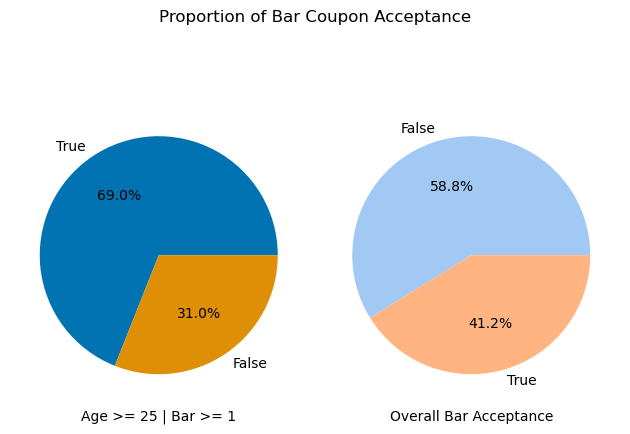

In [220]:
## Querying bar dataframe to select rows that correspond to age above 25 and going to bar more than once a month
## Calculating the coupon acceptance rate for the above 25 age dataset and overall
acceptance_25plus = (data_bar.query('(age != "21" and age != "below21") and (Bar == "4~8" or Bar == "1~3" or Bar == "gt8")')['Y'] == 1).value_counts(normalize=True)
acceptance_overall = (data_bar['Y'] == 1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle('Proportion of Bar Coupon Acceptance')

# Plot the first chart
ax1.pie(acceptance_25plus, labels=acceptance_25plus.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax1.set_xlabel('Age >= 25 | Bar >= 1')

# Plot the second chart
ax2.pie(acceptance_overall, labels=acceptance_overall.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax2.set_xlabel('Overall Bar Acceptance')

plt.tight_layout()
plt.savefig('images/coup-bar_age25.png')


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


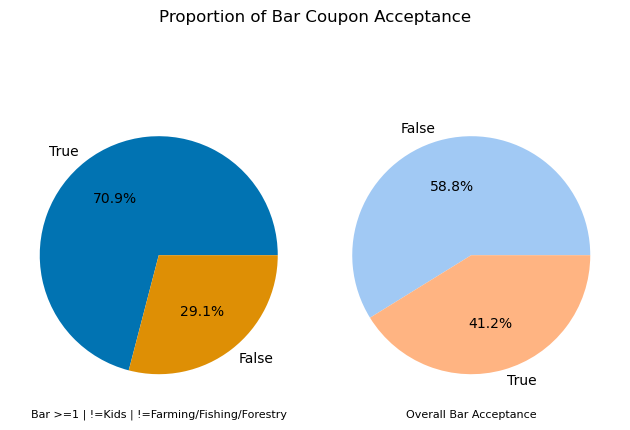

In [221]:
## Querying bar dataframe to select rows that correspond to  going to bar more than once a month, passeangers othen than Kid(s) 
## and occupation other than farming, fishing, or forestry 
## Calculating the coupon acceptance rate for the above 25 age dataset and overall
acceptance_rate = (data_bar.query('(passanger != "Kid(s)") and (occupation != "Farming Fishing & Forestry" ) and (Bar == "4~8" or Bar == "1~3" or Bar == "gt8")')['Y'] == 1).value_counts(normalize=True)
acceptance_overall = (data_bar['Y'] == 1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle('Proportion of Bar Coupon Acceptance')

# Plot the first chart
ax1.pie(acceptance_rate, labels=acceptance_rate.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax1.set_xlabel('Bar >=1 | !=Kids | !=Farming/Fishing/Forestry', fontsize=8)

# Plot the second chart
ax2.pie(acceptance_overall, labels=acceptance_overall.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax2.set_xlabel('Overall Bar Acceptance',  fontsize=8)

plt.tight_layout()
plt.savefig('images/coup_bar_kid_occup.png')


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



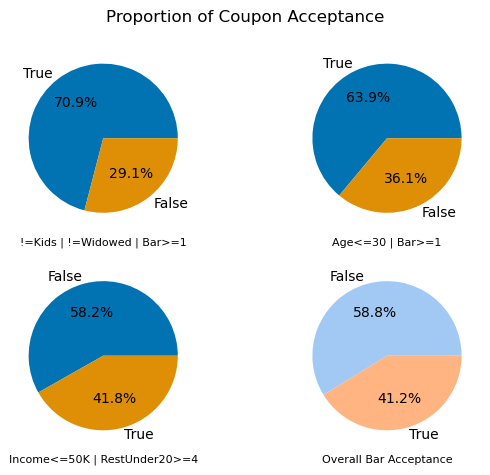

In [222]:
## Querying bar dataframe for ones who go to bars more than once a month, had no kid passengers, and were not widowed
nokids_notwidowed_morethan1 = (data_bar.query('(passanger != "Kid(s)") and (maritalStatus != "Widowed") and (Bar == "4~8" or Bar == "1~3" or Bar == "gt8")')['Y'] ==1).value_counts(normalize=True)

## Querying bar dataframe for ones who go to bars more than once a month and are under the age of 30
under30_morethan1 = (data_bar.query('(age != "21" and age != "below21" and age != "26") and (Bar == "4~8" or Bar == "1~3" or Bar == "gt8")')['Y'] ==1).value_counts(normalize=True)

## Querying bar dataframe for ones who go to cheap restaurants more than 4 times a month and income is less than 50K
include_values = ["$12500 - $24999", "$37500 - $49999", "Less than $12500", "$25000 - $37499", "4~8", "gt8"]
cheaprest4_incless50k = (data_bar[data_bar[['income', 'RestaurantLessThan20']].isin(include_values).any(axis=1)]['Y'] ==1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, ax = plt.subplots(2,2, sharex=True)
fig.suptitle('Proportion of Coupon Acceptance')

## Plot the first chart
ax[0][0].pie(nokids_notwidowed_morethan1, labels=nokids_notwidowed_morethan1.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[0][0].set_xlabel('!=Kids | !=Widowed | Bar>=1', fontsize=8)

## Plot the second chart
ax[0][1].pie(under30_morethan1, labels=under30_morethan1.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[0][1].set_xlabel('Age<=30 | Bar>=1',  fontsize=8)

## Plot the third chart
ax[1][0].pie(cheaprest4_incless50k, labels=cheaprest4_incless50k.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[1][0].set_xlabel('Income<=50K | RestUnder20>=4',  fontsize=8)

ax[1][1].pie(acceptance_overall, labels=acceptance_overall.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax[1][1].set_xlabel('Overall Bar Acceptance', fontsize=8)

plt.tight_layout()
plt.savefig('images/coup_bar_group.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## Observation
# 1. More than half the drivers (almost 59%) declined Bar coupons, when oerall coupon decline rats is lower at around 43%. 
# 2. Drivers had higher chances of accepting coupons when they were not accompanied by Kid(s) as passengers
# 3. Drivers that went to bars more than 4 times had about 2 times higher changes of accepting coupons as compared to drivers who went to bars 3 times or less

##Hypothesis: Drivers are more likely to decline Bar coupons. But when they are 1/travelling without kids; and 2/go to bars regularly, their chances of accpeting Bar coupons are higher.

### [ASK] Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating Coffee  House coupons and how drivers align to them

In [138]:
## Creting a new dataframe by seleting records where coupon column has value Bar

data_cafe = data_new[data_new['coupon'] == 'Coffee House']
data_cafe.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


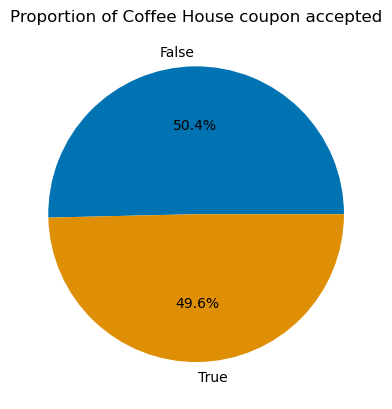

In [223]:
## Identifying proportion of bar coupons that were accepted and creating visualization

cafe_coup_accepted = (data_cafe['Y'] == 1).value_counts(normalize=True)
plt.pie(cafe_coup_accepted, labels=cafe_coup_accepted.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
plt.title('Proportion of Coffee House coupon accepted')
plt.savefig('images/coup_cafe.png')

Idneitfying relation between Coffee House coupon acceptance and frequency of visiting Coffee Houses

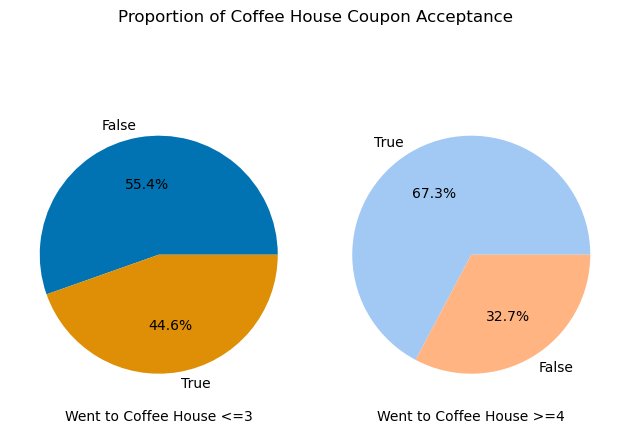

In [224]:
## Calculating proportion of coupon accpetance for individuals that went to Coffee House 3 or fewer times 
three_or_few = (data_cafe.query('CoffeeHouse == "never" or CoffeeHouse == "1~3" or CoffeeHouse == "less1"')['Y'] == 1).value_counts(normalize=True)

## Calculating proportion of coupon accpetance for individuals that went to Coffee House  4 or more times
four_or_more = (data_cafe.query('CoffeeHouse == "gt8" or CoffeeHouse == "4~8"')['Y'] == 1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True)
fig.suptitle('Proportion of Coffee House Coupon Acceptance')

# Plot the first chart
ax1.pie(three_or_few, labels=three_or_few.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax1.set_xlabel('Went to Coffee House <=3')

# Plot the second chart
ax2.pie(four_or_more, labels=four_or_more.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax2.set_xlabel('Went to Coffee House >=4')

plt.tight_layout()
plt.savefig('images/coup_cafe_prop.png')

Identifying relation between Coffee House coupon acceptance with weather and time of the day

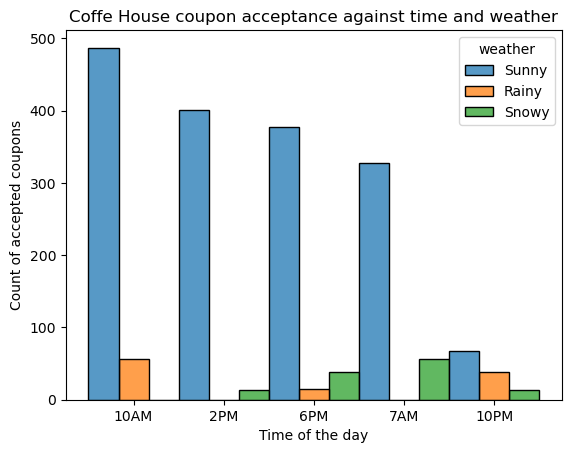

In [157]:
## Querying Cafe dataframe for coupons acceptance during different times of the day and visualizing
data_plot = data_cafe.loc[data_cafe['Y'] == 1,['time','weather']]
sns.histplot(data_plot, x='time', hue='weather', multiple='dodge')
plt.title('Coffe House coupon acceptance against time and weather')
plt.xlabel('Time of the day')
plt.ylabel('Count of accepted coupons')
plt.savefig('images/cafe_time_weather.png')

Identifying relationship between Coffee House coupon acceptance with income and passengers.

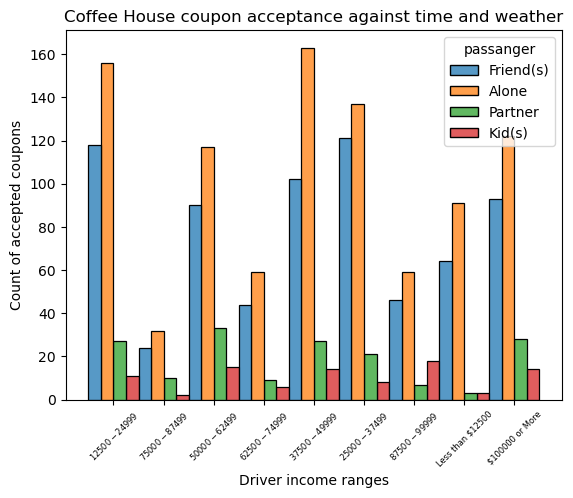

In [168]:
## Querying Cafe dataframe for coupons acceptance with respect to income and passangers in the car
data_plot = data_cafe.loc[data_cafe['Y'] == 1,['passanger','income']]
sns.histplot(data_plot, x='income', hue='passanger', multiple='dodge')
plt.title('Coffee House coupon acceptance against time and weather')
plt.xlabel('Driver income ranges')
plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Count of accepted coupons')
plt.savefig('images/cafe_income_passanger.png')

Identifying acceptance proportions across various passenger types anad weather

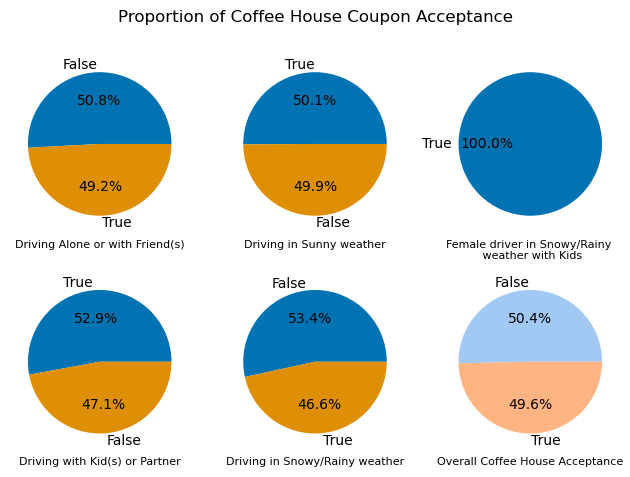

In [225]:
## Querying Cafe dataframe for coupons acceptance for passeangers alone or friend(s) and comapring acceptnace proprotions with overall coffee house coupon acceptane 
acceptance_alone_friends = (data_cafe.query('passanger == "Alone" or passanger == "Friend(s)" ')['Y'] == 1).value_counts(normalize=True)
acceptane_kids_partner = (data_cafe.query('passanger == "Partner" or passanger == "Kid(s)"')['Y'] == 1).value_counts(normalize=True)
acceptance_sunny = (data_cafe.query('weather == "Sunny"')['Y'] == 1).value_counts(normalize=True)
acceptance_snow_rain = (data_cafe.query('weather != "Sunny"')['Y'] == 1).value_counts(normalize=True)
female_kids_snow_rain = (data_cafe.query('weather != "Sunny" and passanger == "Kid(s)" and gender =="Female"')['Y'] == 1).value_counts(normalize=True)

## Printing graphs for both cases in one plot
fig, ax = plt.subplots(2,3, sharex=True)
fig.suptitle('Proportion of Coffee House Coupon Acceptance')

## Plot the first chart
ax[0][0].pie(acceptance_alone_friends, labels=acceptance_alone_friends.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[0][0].set_xlabel('Driving Alone or with Friend(s)', fontsize=8)

## Plot the second chart
ax[1][0].pie(acceptane_kids_partner, labels=acceptane_kids_partner.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[1][0].set_xlabel('Driving with Kid(s) or Partner',  fontsize=8)

## Plot the third chart
ax[0][1].pie(acceptance_sunny, labels=acceptance_sunny.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[0][1].set_xlabel('Driving in Sunny weather',  fontsize=8)

## Plot the fourth chart
ax[1][1].pie(acceptance_snow_rain, labels=acceptance_snow_rain.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[1][1].set_xlabel('Driving in Snowy/Rainy weather',  fontsize=8)

## Plot the fifth chart
ax[0][2].pie(female_kids_snow_rain, labels=female_kids_snow_rain.index, autopct='%1.1f%%',colors=sns.color_palette("colorblind"))
ax[0][2].set_xlabel('Female driver in Snowy/Rainy \n weather with Kids',  fontsize=8)

## Plot the sixth chart
ax[1][2].pie(cafe_coup_accepted, labels=cafe_coup_accepted.index, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
ax[1][2].set_xlabel('Overall Coffee House Acceptance', fontsize=8)

plt.tight_layout()
plt.savefig('images/coup_cafe_group.png')



Observations and Hypothesis

In [ ]:
## Observations
# 1. Drivers are more likely to avail Coffee House coupons during snow or rainy weather as compared to when it is sunny outside
# 2. Drivers that are dirving with Kid(s), partners are more likely to accept coupon as comapred to drivers who are alone or with Friend(s)
# 3. Drivers that go to coffee house 4 or more times are 25% more likely, in comparison, to accpet coffee house coupons as compared to drivers that go to coffee houses 3 times or less 
# 3. Female drivers are more likely to order cofee s compared to male drivers

# Hypothesis is that female drivers when travelling with Kids in Snow or Rain will 100% avail the coupons for Coffee House